In [4]:
##imports
##numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [6]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [21]:
variableName = rawData.iloc[22,5]

In [22]:
print(variableName)

26


In [23]:
variableName = rawData['EDUCATION']

In [24]:
print(variableName)

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64


In [25]:
variableName = rawData.iloc[:,0:4]
print(variableName)

          ID  LIMIT_BAL  SEX  EDUCATION
0          1      20000    2          2
1          2     120000    2          2
2          3      90000    2          2
3          4      50000    2          2
4          5      50000    1          2
...      ...        ...  ...        ...
29995  29996     220000    1          3
29996  29997     150000    1          3
29997  29998      30000    1          2
29998  29999      80000    1          3
29999  30000      50000    1          2

[30000 rows x 4 columns]


In [26]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [28]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,2,2,1,24
1,2,120000,2,2,2,26
2,3,90000,2,2,2,34
3,4,50000,2,2,1,37
4,5,50000,1,2,1,57


In [30]:
#dependent variable
depVar = rawData['PAY_AMT6']
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [31]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,2,2,1,24
1,2,120000,2,2,2,26
2,3,90000,2,2,2,34
3,4,50000,2,2,1,37
4,5,50000,1,2,1,57


In [32]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [33]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [34]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [35]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [36]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [37]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [38]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [39]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [42]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression(n_jobs=10)

In [46]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [47]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [48]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [49]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [50]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.03313556  0.01816231  0.14275252 -0.76560248  0.21946937]


In [54]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.01557722 -0.08739883 -0.03493159 -0.03024199 -0.06146272]


In [55]:
print(cross_val_score(modelLR, X_train, y_train)) 

[ 0.43624538 -1.29417061 -0.07219399 -0.20561122 -4.01498135]


In [56]:
print(X_train)

     BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
984      49860      50187      50022      20114      18777      18273   
913      17187      24045      23180      22000      22000          0   
420      25265      26354      27710      27959      30002      29371   
593      48747      45955      44989      41358      42379      38052   
170      37695      33397      30534      27598      26344      24641   
..         ...        ...        ...        ...        ...        ...   
722          0       3338       3333       3333       3333       3333   
675      64762      63164      32789      31641      29240      28306   
512      20223      52962       3978       1743       2828      50537   
529      18763      14410      13771        362       5308          0   
850      20035      21406      24735      24050      43317      44059   

     PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
984      2500      1289       917      1315      5042  
913      79

In [57]:
print(y_train)

984    2512
913       0
420    1800
593    5002
170    2000
       ... 
722    3333
675    1300
512    3219
529       0
850       0
Name: PAY_AMT6, Length: 562, dtype: int64


In [60]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

X_train.shape, X_test.shape


The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  
The number of observations in the Y training set are: 100


ValueError: Found input variables with inconsistent numbers of samples: [1000, 562]

In [62]:
##Se vuelve a hacer todo con nombre NewData ya que los resultados no son los esperados
#data
newData = pd.read_csv('default of credit card clients.csv', header=1)
newData.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [63]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [64]:
#features
features = newData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [65]:
#dependent variable
dependVar = newData['PAY_AMT6']

In [66]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [67]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [68]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [69]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [70]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [73]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [74]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [75]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.03640134 -0.10666593  0.11255132 -0.11232098 -0.37841543]


In [79]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.01429808 -0.05405259 -0.03011714 -0.04232499 -0.09581694]


In [80]:
print(cross_val_score(modelLR, X_train, y_train)) 

[ 0.43690409 -4.47884095 -0.20830597  0.22439168 -4.28963612]


In [81]:
model.score(X_train,y_train)

0.6187853952035367

In [82]:
modelRF.score(X_train,y_train)

0.8799254700321449

In [83]:
modelSVR.score(X_train,y_train)

-0.020483740287677854

In [84]:
modelLR.score(X_train,y_train)

0.6187853952035367

In [85]:
predictions = modelRF.predict(X_test)

In [86]:
print(predictions)

[2.14383900e+04 9.65770000e+02 1.37710000e+03 5.57827000e+03
 3.55715000e+03 5.17705100e+04 0.00000000e+00 1.82162000e+03
 1.88224800e+04 7.66422000e+03 6.00526000e+03 7.30990000e+02
 3.97440000e+03 5.42766000e+03 4.05962000e+03 2.61399000e+03
 4.80500000e+03 6.24297000e+03 1.40730058e+02 3.31255000e+03
 1.62920400e+04 1.18076600e+04 2.98494000e+03 1.02142000e+03
 6.57861022e+02 7.19640000e+03 8.43747368e+02 5.49289000e+03
 1.56775000e+03 1.98312000e+03 2.53719000e+03 1.13682000e+03
 3.10381000e+03 5.88121000e+03 1.62139000e+03 5.20084000e+03
 3.30676300e+04 7.27970000e+02 3.69142000e+03 3.37597500e+04
 3.82709000e+03 9.61369000e+03 1.47713922e+02 1.47713922e+02
 2.42421000e+03 6.33855000e+03 3.36677000e+03 1.40720800e+04
 9.13090000e+02 1.44763000e+03 1.09680400e+04 1.10400000e+01
 1.47713922e+02 2.29263000e+03 6.40410000e+02 6.80420000e+02
 2.47968600e+04 1.16371396e+02 3.09476000e+03 5.28057000e+03
 3.23534000e+03 2.45152400e+04 3.53127300e+04 2.63817000e+03
 1.00261000e+03 3.638160

In [87]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [88]:
print(rmse)

17696.661958708657


In [89]:
predRsquared = r2_score(y_test,predictions)

In [90]:
print('R Squared: %.3f' % predRsquared)

R Squared: -0.005


In [91]:
print('RMSE: %.3f' % rmse)

RMSE: 17696.662


ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 250, 'y' with size 250.

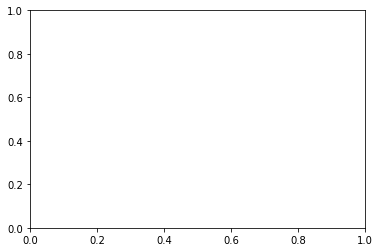

In [92]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [93]:
import matplotlib.pyplot as plt

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 250, 'y' with size 250.

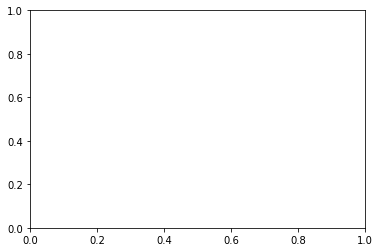

In [94]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [95]:
plt.scatter(np.reshape(predictions,-1), np.reshape(y_test,-1), c=np.reshape(c,-1))
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

NameError: name 'c' is not defined

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 250, 'y' with size 250.

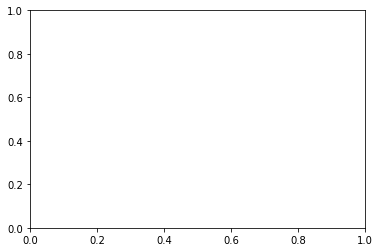

In [96]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = -1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 250, 'y' with size 250.

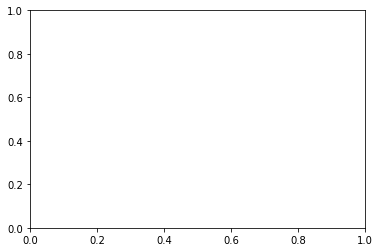

In [97]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = -2)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [99]:
plt.scatter(np.reshape(predictions,-1), np.reshape(y_test,-1), alpha=np.reshape(alpha,-1))
plt.scatter(y_test, predictions, color=['blue','green'], alpha = -1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

NameError: name 'alpha' is not defined

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 250, 'y' with size 250.

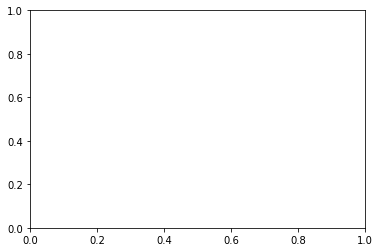

In [100]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [101]:
print(y_test)

965    10002
494      276
794     1114
167    50000
896        0
       ...  
930     3000
224    30592
303     2000
93      7736
953        0
Name: PAY_AMT6, Length: 250, dtype: int64


In [102]:
print(predictions)

[2.14383900e+04 9.65770000e+02 1.37710000e+03 5.57827000e+03
 3.55715000e+03 5.17705100e+04 0.00000000e+00 1.82162000e+03
 1.88224800e+04 7.66422000e+03 6.00526000e+03 7.30990000e+02
 3.97440000e+03 5.42766000e+03 4.05962000e+03 2.61399000e+03
 4.80500000e+03 6.24297000e+03 1.40730058e+02 3.31255000e+03
 1.62920400e+04 1.18076600e+04 2.98494000e+03 1.02142000e+03
 6.57861022e+02 7.19640000e+03 8.43747368e+02 5.49289000e+03
 1.56775000e+03 1.98312000e+03 2.53719000e+03 1.13682000e+03
 3.10381000e+03 5.88121000e+03 1.62139000e+03 5.20084000e+03
 3.30676300e+04 7.27970000e+02 3.69142000e+03 3.37597500e+04
 3.82709000e+03 9.61369000e+03 1.47713922e+02 1.47713922e+02
 2.42421000e+03 6.33855000e+03 3.36677000e+03 1.40720800e+04
 9.13090000e+02 1.44763000e+03 1.09680400e+04 1.10400000e+01
 1.47713922e+02 2.29263000e+03 6.40410000e+02 6.80420000e+02
 2.47968600e+04 1.16371396e+02 3.09476000e+03 5.28057000e+03
 3.23534000e+03 2.45152400e+04 3.53127300e+04 2.63817000e+03
 1.00261000e+03 3.638160

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 250, 'y' with size 250.

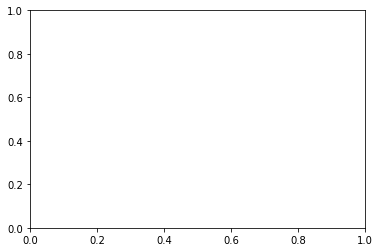

In [103]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.05)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [107]:
##Se hace el proceso con la variable dependiente default y el dataset completo con los modelos SVR, RF y LR
#features
featuresc = rawData.iloc[:,0:24]
print('Summary of feature sample')
featuresc.head()


Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [106]:
print(rawData)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [110]:
##Se selecciona la variable dependiente
#dependent variable
depVar = rawData['default payment next month']

KeyError: 'default'

In [111]:
rawData.replace({'default' : 28}, 0, inplace=True)

In [112]:
print(rawData)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [113]:
print(newData)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [114]:
##Se selecciona la variable dependiente
#dependent variable
depVar = rawData['default payment next month']

In [115]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [117]:
##Se trabajan los datos de training y testing
##Training
X_train = (featuresc[: 1000])
X_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [118]:
##Se trabajan los datos de training y testing
#Testing Set (X Testing)
X_test = featuresc[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29900  29901      20000    1          2         2   29      0      0     -2   
29901  29902      50000    1          2         2   29      1      2      0   
29902  29903     170000    1          3         2   30      0     -1      0   
29903  29904     260000    1          1         1   30     -1      0     -1   
29904  29905      60000    1          3         2   30      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900     -2  ...          0          0          0          0         0   
29901      0  ...     103486      50590      50248      49387         0   
29902      0  ...     168955     161351     126198     124746    168096   
29903     -1  ...      13333         99         99     172104     10018   
29904      0  ...      54126      58732      59306      59728      2600   

       PAY_A

In [119]:
##Se hace la particion para la variable dependiente
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [120]:
##Establecer la verdad fundamental
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 24), (250, 24))

In [122]:
##se importa random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
##Se configura el modelo
ModelRFClassifier = RandomForestClassifier(n_estimators=10, max_depth=None,
                                             random_state=0)

In [124]:
##Se aplica el modelo Random Forest
ModelRFClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [125]:
##Se predicen los valores
predictionsRF = ModelRFClassifier.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [126]:
y_test = y_test.reshape(1,-1)

AttributeError: 'Series' object has no attribute 'reshape'

In [129]:
y_test = y_test.ndarray.reshape (1,-1)

AttributeError: 'Series' object has no attribute 'ndarray'

In [131]:
##Se cuenta la cantidad de ceros y unos para el dataset original
pd.value_counts(newData['default payment next month'])

0    23364
1     6636
Name: default payment next month, dtype: int64

In [132]:
from sklearn.metrics import classification_report
import sklearn.metrics

In [133]:
##Se hace la matriz de confusion
sklearn.metrics.confusion_matrix(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [137]:
dtype(y_test)

NameError: name 'dtype' is not defined

In [136]:
str(y_test)

'468    0\n371    0\n111    0\n743    0\n535    0\n      ..\n942    0\n585    0\n29     0\n789    0\n283    0\nName: default payment next month, Length: 250, dtype: int64'

In [138]:
string(y_test)

NameError: name 'string' is not defined

In [139]:
cats(y_test)

NameError: name 'cats' is not defined

In [145]:
 newData['default payment next month'] = pd.str(newData.default payment next month)
print ( newData.dtypes)  

SyntaxError: invalid syntax (<ipython-input-145-bd617d122344>, line 1)

In [144]:
 newData['default payment next month'] = pd.cats(newData.default payment next month)
 print ( newData.dtypes   

SyntaxError: invalid syntax (<ipython-input-144-9f4bec4fd4f0>, line 1)

In [146]:
 newData['default payment next month'] = newData['default payment next month'].astype('category')

In [149]:
print(newData)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [150]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [152]:
##Cambiar a categoria las variables que se pueden
newData['SEX'] = newData['SEX'].astype('category')
newData['EDUCATION'] = newData['EDUCATION'].astype('category')
newData['MARRIAGE'] = newData['MARRIAGE'].astype('category')

In [153]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

In [154]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [156]:
##Covarianza para newData
covnewData = np.cov(newData,bias=True)
print (covnewData)

AttributeError: 'float' object has no attribute 'shape'

In [159]:
##Covarianza para newData
covnewData = np.cov(rawData,bias=True)


MemoryError: 

In [160]:
##Se hace el proceso con la variable dependiente default y el dataset completo con los modelos SVR, RF y LR
#features
featuresc = newData.iloc[:,1:23]
print('Summary of feature sample')
featuresc.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [161]:
##Se selecciona la variable dependiente
#dependent variable
depVar = newData['default payment next month']

In [162]:
##Se trabajan los datos de training y testing
##Training
X_train = (featuresc[: 4000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [163]:
##Se trabajan los datos de training y testing
#Testing Set (X Testing)
X_test = featuresc[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
29900      20000   1         2        2   29      0      0     -2     -2   
29901      50000   1         2        2   29      1      2      0      0   
29902     170000   1         3        2   30      0     -1      0      0   
29903     260000   1         1        1   30     -1      0     -1     -1   
29904      60000   1         3        2   30      0      0      0      0   

       PAY_5  ...  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900     -2  ...          0          0          0          0          0   
29901      0  ...      48750     103486      50590      50248      49387   
29902      0  ...     168088     168955     161351     126198     124746   
29903     -1  ...      17082      13333         99         99     172104   
29904      0  ...      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT

In [164]:
##Se hace la particion para la variable dependiente
#Dependent Variable Training Set (y Training)
y_train = depVar[: 4000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 4000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((3000, 22), (1000, 22))

In [166]:
##Se aplica el modelo Random Forest
ModelRFClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [167]:
##Se predicen los valores
predictionsRF = ModelRFClassifier.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [168]:
predictionsrf = ModelRFClassifier.predict(x_test)

NameError: name 'x_test' is not defined

In [169]:
predictionsRF.info()

NameError: name 'predictionsRF' is not defined

In [170]:
sklearn.metrics.confusion_matrix(y_test,predictionsRF)

NameError: name 'predictionsRF' is not defined

In [171]:
newData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

In [173]:
##Se empieza el proceso para tratar los datos de manera que se reduzcan y unificarlos para poder trabajarlos
##ya se convirtieron los datos de "default payment next month", sex, aducation, marriage en categoria y se aplica a los pay
newData["PAY_0"]= newData["PAY_0"].astype("category")
newData["PAY_2"]= newData["PAY_0"].astype("category")
newData["PAY_3"]= newData["PAY_0"].astype("category")
newData["PAY_4"]= newData["PAY_0"].astype("category")
newData["PAY_5"]= newData["PAY_0"].astype("category")
newData["PAY_6"]= newData["PAY_0"].astype("category")

In [174]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int

In [3]:
##Estimacion de covarianza
covMat = newData.cov()
print(covMat)


NameError: name 'newData' is not defined

In [4]:
newData.info()

NameError: name 'newData' is not defined

In [7]:
newData.info()

NameError: name 'newData' is not defined

In [6]:
rawData.info()

NameError: name 'rawData' is not defined

In [8]:
##se apaga la computadora, por lo que no se pueden ver los datos y hay que empezar por cargarlos

##librerias
##imports
##numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [9]:
##cargar datos
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
##cargar datos
#data
newData = pd.read_csv('default of credit card clients.csv', header=1)
newData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
##pasar a categoria variables necesarias
newData["SEX"]= newData["SEX"].astype("category")
newData["EDUCATION"]= newData["EDUCATION"].astype("category")
newData["MARRIAGE"]= newData["MARRIAGE"].astype("category")
newData["AGE"]= newData["AGE"].astype("category")
newData["PAY_0"]= newData["PAY_0"].astype("category")
newData["PAY_2"]= newData["PAY_0"].astype("category")
newData["PAY_3"]= newData["PAY_0"].astype("category")
newData["PAY_4"]= newData["PAY_0"].astype("category")
newData["PAY_5"]= newData["PAY_0"].astype("category")
newData["PAY_6"]= newData["PAY_0"].astype("category")
newData["default payment next month"]= newData["default payment next month"].astype("category")

In [12]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null 

In [14]:
##Se estima la covarianza
covMat = newData.cov()
print(covMat)


                     ID     LIMIT_BAL     BILL_AMT1     BILL_AMT2  \
ID         7.500250e+07  2.941664e+07  1.236447e+07  1.108392e+07   
LIMIT_BAL  2.941664e+07  1.683446e+10  2.727020e+09  2.570130e+09   
BILL_AMT1  1.236447e+07  2.727020e+09  5.422240e+09  4.986670e+09   
BILL_AMT2  1.108392e+07  2.570130e+09  4.986670e+09  5.065705e+09   
BILL_AMT3  1.462688e+07  2.548533e+09  4.556511e+09  4.582086e+09   
BILL_AMT4  2.248126e+07  2.453926e+09  4.075286e+09  4.086508e+09   
BILL_AMT5  8.795803e+06  2.331481e+09  3.714795e+09  3.720401e+09   
BILL_AMT6  8.628506e+06  2.243837e+09  3.519876e+09  3.524868e+09   
PAY_AMT1   1.397501e+06  4.195711e+08  1.710894e+08  3.305146e+08   
PAY_AMT2   1.677383e+06  5.333504e+08  1.685692e+08  1.653859e+08   
PAY_AMT3   5.969803e+06  4.801180e+08  2.034048e+08  1.888731e+08   
PAY_AMT4   1.057334e+06  4.131202e+08  1.826164e+08  1.643518e+08   
PAY_AMT5   8.629502e+04  4.305657e+08  1.879091e+08  1.717652e+08   
PAY_AMT6   4.618460e+05  5.065153e

In [15]:
##se unifica educación ya que 0,5 y 6 es igual a 4 que son otros
newData["EDUCATION"]= np.where(newData["EDUCATION"] == 0, 4, newData["EDUCATION"])
newData["EDUCATION"]= np.where(newData["EDUCATION"] == 6, 4, newData["EDUCATION"])
newData["EDUCATION"]= np.where(newData["EDUCATION"] == 5, 4, newData["EDUCATION"])
newData["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [16]:
##Resumen de valores en comunicacion
pd.value_counts(newData['EDUCATION'])


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [19]:
##se aplica dummy
dummyData=newData.iloc[ :,1:23]
dummyData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,2,2,2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,-1,-1,-1,-1,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [21]:
##con los datos se crea la tabla ya con la aplicacion de dummy
dummyData = pd.get_dummies(dummyData)
dummyData.head()


,LIMIT_BAL,EDUCATION,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,2,3913,3102,689,0,0,0,0,689,...,0,0,0,1,0,0,0,0,0,0
1,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,0,0,0,0,0,0,0,0
2,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,0,1,0,0,0,0,0,0,0,0
4,50000,2,8617,5670,35835,20940,19146,19131,2000,36681,...,1,0,0,0,0,0,0,0,0,0


In [22]:
##Se agrega la columna default payment next month
dummyData["default payment next month"] = newData["default payment next month"]

In [23]:
dummyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 142 entries, LIMIT_BAL to default payment next month
dtypes: category(1), int64(13), uint8(128)
memory usage: 6.7 MB


In [24]:
dummyData.head()

,LIMIT_BAL,EDUCATION,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month
0,20000,2,3913,3102,689,0,0,0,0,689,...,0,0,1,0,0,0,0,0,0,1
1,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,0,0,0,0,0,1
2,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,1,0,0,0,0,0,0,0,0,0
3,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,1,0,0,0,0,0,0,0,0,0
4,50000,2,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,0


In [25]:
##Se estima la covarianza
covDummy = dummyData.cov()
print(covDummy)

              LIMIT_BAL     EDUCATION     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10 -22322.227579  2.727020e+09  2.570130e+09   
EDUCATION -2.232223e+04      0.554272  9.098853e+02  6.347987e+02   
BILL_AMT1  2.727020e+09    909.885257  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09    634.798683  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09    346.636738  4.556511e+09  4.582086e+09   
...                 ...           ...           ...           ...   
PAY_6_4   -2.263012e+02      0.000466  4.275809e+01  4.420082e+01   
PAY_6_5   -8.182247e+01      0.000337  2.583767e+01  2.607337e+01   
PAY_6_6   -2.441173e+01      0.000158  1.333399e+01  1.269213e+01   
PAY_6_7   -6.578849e+00      0.000081  3.115581e+01  2.896091e+01   
PAY_6_8   -4.040808e+01      0.000067  3.960408e+01  3.984811e+01   

              BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6  \
LIMIT_BAL  2.548533e+09  2.453926e+09  2.331481e+09  2.243837e+09   
EDUCATION  3.466367e+02 -2.936362

In [26]:
##Features
features = dummyData.iloc[:,0:141]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,EDUCATION,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,2,3913,3102,689,0,0,0,0,689,...,0,0,0,1,0,0,0,0,0,0
1,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,0,0,0,0,0,0,0,0
2,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,0,1,0,0,0,0,0,0,0,0
4,50000,2,8617,5670,35835,20940,19146,19131,2000,36681,...,1,0,0,0,0,0,0,0,0,0


In [27]:
##Variable dependiente
depVar = dummyData['default payment next month']

In [28]:
##Se importa libreria para normalizacion
from sklearn import preprocessing

In [29]:
##se importa random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
##Se importa classification_report
from sklearn.metrics import classification_report

In [31]:
depVar.head()


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [32]:
#Normalización
NormalData = preprocessing.scale(features)
print(NormalData)

[[-1.13672015  0.21186989 -0.64250107 ... -0.01915205 -0.01732311
  -0.02517409]
 [-0.3659805   0.21186989 -0.65921875 ... -0.01915205 -0.01732311
  -0.02517409]
 [-0.59720239  0.21186989 -0.29855966 ... -0.01915205 -0.01732311
  -0.02517409]
 ...
 [-1.05964618  0.21186989 -0.64722711 ... -0.01915205 -0.01732311
  -0.02517409]
 [-0.67427636  1.55508562 -0.71798186 ... -0.01915205 -0.01732311
  -0.02517409]
 [-0.90549825  0.21186989 -0.04473888 ... -0.01915205 -0.01732311
  -0.02517409]]


In [33]:
#Se descarga la libreria
from sklearn.feature_selection import RFECV
##Determinar el numero de atributos necesarios para mejor precision
RFClasif = RandomForestClassifier(random_state=101)

In [34]:
rfecv = RFECV(estimator = RFClasif, step = 1, cv=StratifiedKFold(10), scoring = 'accuracy')

NameError: name 'StratifiedKFold' is not defined

In [35]:
#se importa la libreria
from sklearn.model_selection import StratifiedKFold

In [36]:
rfecv = RFECV(estimator = RFClasif, step = 1, cv=StratifiedKFold(10), scoring = 'accuracy')

In [38]:
##se aplica
rfecv.fit(NormalData,depVar)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [39]:
#Muestra el número de atributo necesarios 
print('Optimal number of features: {}'.format(rfecv.n_features_))


Optimal number of features: 99


In [40]:
len(NormalData)

30000

In [41]:
print(np.where(rfecv.support_ == False)[0])


[ 15  19  60  62  63  64  65  66  67  68  69  70  71  72  73  74  81  82
  83  84  85  93  94  95  96 103 104 105 106 107 115 116 117 118 126 127
 128 129 137 138 139 140]


In [42]:
NormalData.drop(NormalData.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [43]:
NormalData.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [44]:
##librerias
##imports
##numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [45]:
NormalData.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFol

ImportError: cannot import name 'StratifiedKFol' from 'sklearn.model_selection' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [47]:
from sklearn.model_selection import StratifiedKFol

ImportError: cannot import name 'StratifiedKFol' from 'sklearn.model_selection' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [48]:
print(np.where(rfecv.support_ == False)[0])


[ 15  19  60  62  63  64  65  66  67  68  69  70  71  72  73  74  81  82
  83  84  85  93  94  95  96 103 104 105 106 107 115 116 117 118 126 127
 128 129 137 138 139 140]


In [49]:
NormalData.drop(NormalData.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'